### Project : Classification

1. We will first explore the dataset provided
2. We will create models to predict whether a client will subscribe to a term deposit. 

Let's start by importing the libraries that we will be using.

dataset link-'https://www.kaggle.com/code/shabareesharyan/predicting-term-deposit-subscription/data?select=train.csv'

In [150]:
# importing libraries
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt 
import seaborn as sn                   # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [189]:
# loading the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Let's check the features present in our data and then we will look at their data types.

In [152]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [153]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

It can be infered that **subscribed** is the target variable as it is not present in the test dataset. Let's look at the shape of the dataset.

In [154]:
train.shape, test.shape

((31647, 18), (13564, 17))

We have 17 independent variables and 1 target variable, i.e. subscribed in the train dataset. We have similar features in the test dataset as the train dataset except the subscribed. We will predict the subscribed with the help of model built using the train data.

Next, let's look at how many categorical and numerical variables are there in our dataset. We will look at their data types.

In [155]:
# Print data types for each variable
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

We can see there are two format of data types:

1. **object**: Object format means variables are categorical. Categorical variables in our dataset are: job, marital, education, default, housing, loan, contact, month, poutcome, subscribed

2. **int64**: It represents the integer variables. Integer variables in our dataset are: ID, age, balance, day, duration, campaign, pdays, previous

In [156]:
#printing sample rows of the dataset
train.sample(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
23996,14376,50,management,married,tertiary,no,6739,yes,no,cellular,14,jul,68,3,-1,0,unknown,no
8577,23759,58,management,married,tertiary,no,0,no,no,cellular,28,aug,24,9,-1,0,unknown,no
4087,11707,43,blue-collar,married,primary,no,1794,yes,no,unknown,20,jun,35,1,-1,0,unknown,no
28676,239,44,admin.,divorced,secondary,no,66,yes,no,unknown,5,may,206,1,-1,0,unknown,no
19945,34981,37,unemployed,married,secondary,no,4969,yes,no,cellular,6,may,169,1,-1,0,unknown,no


## Univariate Analysis

Now Let's look at the distribution of our target variable, i.e. subscribed. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

In [157]:
train['education'].value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

In [158]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [159]:
# Normalize can be set to True to print proportions instead of number 
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

<AxesSubplot:>

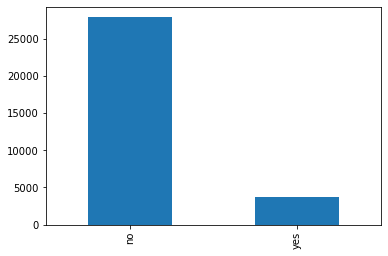

In [160]:
# plotting the bar plot of frequencies
train['subscribed'].value_counts().plot.bar()

So, 3715 users out of total 31647 have subscribed which is around 12%. Let's now explore the variables to have a better understanding of the dataset. We will first explore the variables individually using univariate analysis, then we will look at the relation between various independent variables and the target variable. We will also look at the correlation plot to see which variables affects the target variable most.

Let's first look  at the distribution of age variable to see how many people belongs to a particular age group.

<AxesSubplot:xlabel='age', ylabel='Density'>

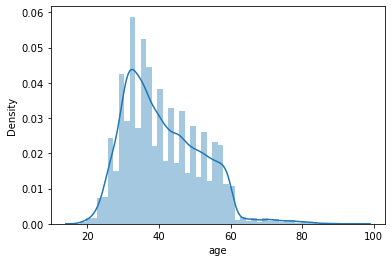

In [161]:
sn.distplot(train["age"])

We can infer that most of the clients fall in the age group between 20-60.

<AxesSubplot:>

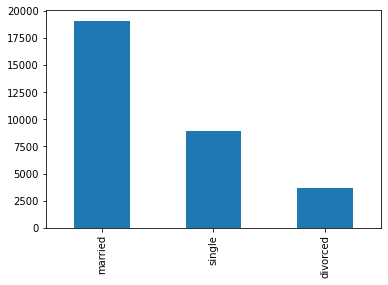

In [174]:
train['marital'].value_counts().plot.bar()

So,most of the people are married

<AxesSubplot:>

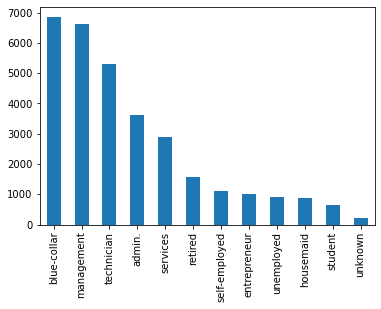

In [163]:
train['job'].value_counts().plot.bar()

Now let's look at what are the different types of jobs of the clients. As job is a categorical variable, we will look at its frequency table.We see that most of the clients belongs to blue-collar job and the students are least in number as students generally do not take a term deposit. Let's also look at how many clients have default history.

<AxesSubplot:>

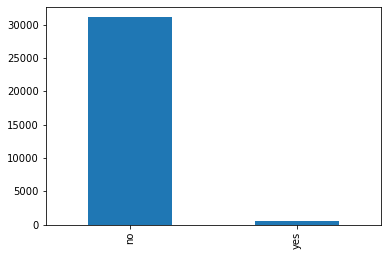

In [164]:
train['default'].value_counts().plot.bar()

More than 90% of the clients have no default history. Now we will explore these variables against the target variable using bivariate analysis. We will make use of scatter plots for continuous or numeric variables and crosstabs for the categorical variables. Let's start with job and subscribed variable.

#### replacing values in subscribed with 0 and 1

In [190]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

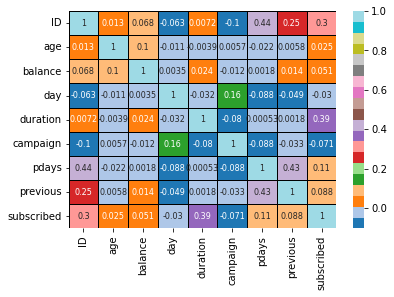

In [191]:
corr = train.corr()
sn.heatmap(corr,cmap="tab20",annot=True,linecolor="black",linewidth=1,annot_kws={'size':8})
plt.show()

We can infer that duration of the call is highly correlated with the target variable. This can be verified as well. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

Next we will look for any missing values in the dataset.

In [177]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

There are no missing values in the train dataset. 

Next, we will start to build our predictive model to predict whether a client will subscribe to a term deposit or not.

As the sklearn models takes only numerical input, we will convert the categorical variables into numerical values using dummies. We will remove the ID variables as they are unique values and then apply dummies. We will also remove the target variable and keep it in a separate variable.

## Model Building

In [192]:
train.drop('ID',axis=1,inplace=True)

In [193]:
target = train['subscribed']
train = train.drop('subscribed',1)

In [194]:
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure


In [195]:
# applying dummies on the train dataset
train = pd.get_dummies(train)

Now, its time to build our model. We will split the train data into training and validation set so that we will be able to validate the results of our model on the validation set. We will keep 20% data as validation set and rest as the training set. 

In [196]:
from sklearn.model_selection import train_test_split

In [197]:
# splitting into train and validation with 20% data in validation set and 80% data in train set.
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.2, random_state=12)

In [198]:
X_train

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
19036,40,581,15,1013,3,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1287,37,808,5,228,2,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
11880,37,1352,1,93,1,347,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
17525,48,147,6,142,3,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
8295,42,16,11,79,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7409,34,-292,19,181,6,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19709,28,462,5,410,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
25990,51,1329,17,150,2,287,2,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5787,34,1134,17,408,1,329,2,0,1,0,...,0,0,0,0,0,0,1,0,0,0


Now our data is ready. Its time to build our model and check its performance. Logistic regression is used for classification problems and as it is a classification problem let's first build a Logistic Regression model.

## Logistic Regression

In [199]:
from sklearn.linear_model import LogisticRegression

In [200]:
# defining the logistic regression model
lreg = LogisticRegression()

In [201]:
# fitting the model on  X_train and y_train
lreg.fit(X_train,y_train)

LogisticRegression()

In [202]:
# making prediction on the validation set
prediction = lreg.predict(X_val)

Now we will evaluate how accurate our predictions are. As the evaluation metric for this problem is accuracy, let's calculate the accuracy on validation set.

In [203]:
from sklearn.metrics import accuracy_score

In [204]:
# calculating the accuracy score
accuracy_score(y_val, prediction)

0.8914691943127963

We got an accuracy score of around 90% on the validation dataset. 

Let's try decision tree algorithm now to check if we get better accuracy with that. 

## Decision Tree

In [205]:
from sklearn.tree import DecisionTreeClassifier

In [210]:
# defining the decision tree model with depth of 5, we can tune it further to improve the accuracy score
clf = DecisionTreeClassifier(max_depth=5, random_state=0)

In [211]:
# fitting the decision tree model
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [212]:
# making prediction on the validation set
predict = clf.predict(X_val)

In [213]:
# calculating the accuracy score
accuracy_score(y_val, predict)

0.8957345971563981

We got an accuracy around 90% on the validation set.We can try to improve the score by tuning hyperparameters of the model. Let's now make the prediction on test dataset. We will make the similar changes in the test set as we have done in the training set before making the predictions.


In [214]:
test = pd.get_dummies(test)

In [217]:
test.drop('ID',axis=1,inplace=True)

#### We dropped the id column as we did it with the training data set too

In [219]:
test_prediction = clf.predict(test)

In [228]:
#accuracy_score(y_val, predict)